In [44]:
import sympy as sym
import numpy as np
import pandas as pd

def simple_extremtype(value):
    if(value < 0):
        return 'Minimum'
    elif(value > 0):
        return 'Maksimum'
    else:
        return 'Stasioner'

def calcexpr(expression, symbol, params):
    exp = expbuilder(expression, symbol)
    exp = exp.replace(symbol, str(params))
    return eval(exp)

def linearequo(expression, symbol):
    exp = expression
    symb = sym.Symbol(symbol)
    return sym.solve(exp, symb)

def expbuilder(expression, symbol):
    exp = expression.replace('^', '**')
    exp = exp.replace(symbol, "*({})".format(symbol))
    return str(exp)

def derivative(expression, symbol):
    exp = expbuilder(expression, symbol)
    symb = sym.symbols(symbol)
    return sym.diff(exp, symb)

# Input Expression dan Symbol

In [45]:
expression = '1/3x^3 - 1x^2 - 3x + 2'
symbol = 'x'
param_range = range(-2, 3)

# Turunan Pertama

In [46]:
drv_one = derivative(expression, symbol)
drv_one

x**2 - 2*x - 3

# Titik stasioner f`(x) = 0

In [47]:
drv_lineq = linearequo(drv_one, symbol)
drv_lineq

[-1, 3]

# Nilai Stasioner

In [48]:
stas_val = [calcexpr(expression, symbol, i) for i in drv_lineq]
stas_val

[3.666666666666667, -7.0]

# Daftar Koordinat Stasioner

In [49]:
extreme_type = [simple_extremtype(i) for i in stas_val]
list_coordinate = np.stack((drv_lineq, stas_val, extreme_type), axis=1)

columns = ['Titik', 'Nilai', 'Jenis Ekstrim']
pd.DataFrame(list_coordinate, columns=columns)

,Titik,Nilai,Jenis Ekstrim
0,-1,3.66667,Maksimum
1,3,-7,Minimum


# Daftar Koordinat dengan Range

In [50]:
exp_val = [calcexpr(expression, symbol, i) for i in param_range]
list_coordinate = np.stack((param_range, exp_val), axis=1)

columns = ['Titik', 'Nilai']
pd.DataFrame(list_coordinate, columns=columns)

,Titik,Nilai
0,-2.0,1.333333
1,-1.0,3.666667
2,0.0,2.000000
3,1.0,-1.666667
4,2.0,-5.333333


# Grafik Koordinat dengan Range

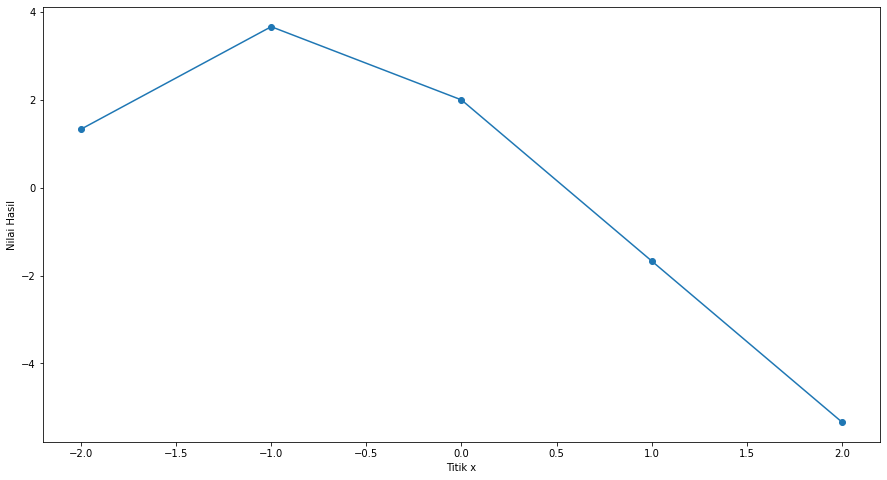

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.scatter(param_range, exp_val)
plt.plot(param_range, exp_val)
plt.ylabel('Nilai Hasil')
plt.xlabel('Titik x')
plt.show()